In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt


In [ ]:
# Step 1: Load and pre-process the data
data = pd.read_csv('/content/weatherAUS.csv')


In [ ]:
def nullvalues(data):
    for i in data.columns:
        if data[i].dtypes =='object':
            data[i] = data[i].fillna('unknown')
        else :
            data[i] = data[i].fillna(0)
    return data

In [ ]:
nullvalues(data)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32550,30-10-2014,Sydney,15.5,30.8,0.0,5.8,12.6,E,28.0,W,...,61.0,32.0,1015.6,1011.6,2.0,3.0,21.1,28.4,No,No
32551,31-10-2014,Sydney,16.3,30.2,0.0,9.2,11.7,NNE,41.0,WNW,...,55.0,43.0,1013.4,1008.2,1.0,6.0,22.4,26.3,No,unknown
32552,01-11-2014,Sydney,21.3,36.5,0.0,10.0,10.6,unknown,0.0,NNW,...,35.0,31.0,1003.9,998.2,1.0,6.0,29.1,32.4,unknown,Yes
32553,02-11-2014,Sydney,13.7,23.5,2.4,15.0,12.9,W,56.0,W,...,26.0,23.0,1017.9,1017.9,1.0,1.0,16.8,21.8,Yes,No


In [ ]:
s = (data.dtypes == "object" )
object_cols = list(s[s].index)# Apply label encoder to each column with categorical data
print(s)

Date              True
Location          True
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir       True
WindGustSpeed    False
WindDir9am        True
WindDir3pm        True
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday         True
RainTomorrow      True
dtype: bool


In [ ]:
data['WindDir9am']

0          W
1        NNW
2          W
3         SE
4        ENE
        ... 
32550      W
32551    WNW
32552    NNW
32553      W
32554    WNW
Name: WindDir9am, Length: 32555, dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32555 entries, 0 to 32554
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           32555 non-null  object 
 1   Location       32555 non-null  object 
 2   MinTemp        32555 non-null  float64
 3   MaxTemp        32555 non-null  float64
 4   Rainfall       32555 non-null  float64
 5   Evaporation    32555 non-null  float64
 6   Sunshine       32555 non-null  float64
 7   WindGustDir    32555 non-null  object 
 8   WindGustSpeed  32555 non-null  float64
 9   WindDir9am     32555 non-null  object 
 10  WindDir3pm     32555 non-null  object 
 11  WindSpeed9am   32555 non-null  float64
 12  WindSpeed3pm   32555 non-null  float64
 13  Humidity9am    32555 non-null  float64
 14  Humidity3pm    32555 non-null  float64
 15  Pressure9am    32555 non-null  float64
 16  Pressure3pm    32555 non-null  float64
 17  Cloud9am       32555 non-null  float64
 18  Cloud3

In [ ]:
data['WindGustDir'] = data['WindGustDir'].astype(str)
data['WindDir9am'] = data['WindDir9am'].astype(str)
data['RainToday'] = data['RainToday'].astype(str)
data['RainTomorrow'] = data['RainTomorrow'].astype(str)

In [ ]:

from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
for i in object_cols:

    data[i] = label_encoder.fit_transform(data[i])

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,102,0,13.4,22.9,0.6,0.0,0.0,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,212,0,7.4,25.1,0.0,0.0,0.0,14,44.0,6,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,0
2,322,0,12.9,25.7,0.0,0.0,0.0,15,46.0,13,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,0
3,432,0,9.2,28.0,0.0,0.0,0.0,4,24.0,9,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,0
4,542,0,17.5,32.3,1.0,0.0,0.0,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [ ]:
label_encoder = LabelEncoder()
for i in object_cols:
    print(i)
    data[i] = label_encoder.fit_transform(data[i])

Date
Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


In [ ]:
X = data.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']

In [ ]:
col_names = list(X.columns)
s_scaler = StandardScaler()
features = s_scaler.fit_transform(X)
features = pd.DataFrame(X, columns=col_names)

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2)
print(X_train.shape,y_train.shape, X_test.shape,y_test.shape)

(26044, 22) (26044,) (6511, 22) (6511,)


In [ ]:

# Step 2: Build an ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Step 3: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
# Step 4: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32)



Epoch 1/30
814/814 [==============================] - 2s 2ms/step - loss: -46.7097 - accuracy: 0.7519 - val_loss: -21.5629 - val_accuracy: 0.8006
Epoch 2/30
814/814 [==============================] - 2s 3ms/step - loss: -65.1092 - accuracy: 0.7450 - val_loss: -13.2266 - val_accuracy: 0.7727
Epoch 3/30
814/814 [==============================] - 2s 3ms/step - loss: -91.3793 - accuracy: 0.7494 - val_loss: -29.4371 - val_accuracy: 0.7664
Epoch 4/30
814/814 [==============================] - 2s 2ms/step - loss: -122.8559 - accuracy: 0.7442 - val_loss: -55.2494 - val_accuracy: 0.7280
Epoch 5/30
814/814 [==============================] - 2s 2ms/step - loss: -155.6824 - accuracy: 0.7340 - val_loss: -52.9179 - val_accuracy: 0.6796
Epoch 6/30
814/814 [==============================] - 2s 2ms/step - loss: -197.2213 - accuracy: 0.7357 - val_loss: -29.3432 - val_accuracy: 0.7741
Epoch 7/30
814/814 [==============================] - 2s 2ms/step - loss: -248.2794 - accuracy: 0.7335 - val_loss: -74.19

In [ ]:
# Step 5: Plot accuracy and loss for training and validation dataset
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

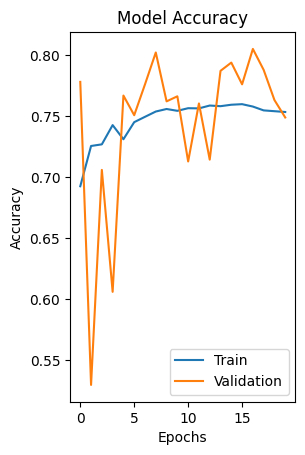

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')


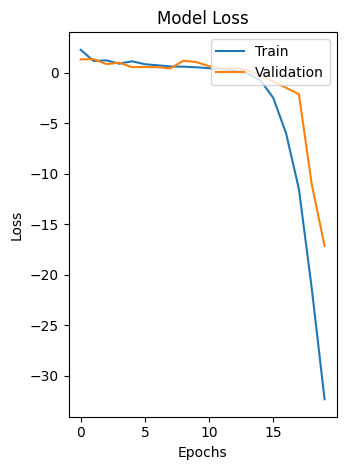

In [ ]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# Step 6: Implement regularization techniques and analyze performance
model_reg = Sequential()
model_reg.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(1, activation='sigmoid'))

In [ ]:
model_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_reg = model_reg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)


Epoch 1/20
814/814 [==============================] - 5s 4ms/step - loss: 18.3158 - accuracy: 0.6842 - val_loss: 1.1397 - val_accuracy: 0.7639
Epoch 2/20
814/814 [==============================] - 2s 2ms/step - loss: 1.1585 - accuracy: 0.7542 - val_loss: 1.0146 - val_accuracy: 0.7639
Epoch 3/20
814/814 [==============================] - 2s 2ms/step - loss: 1.0033 - accuracy: 0.7586 - val_loss: 0.9320 - val_accuracy: 0.7639
Epoch 4/20
814/814 [==============================] - 2s 2ms/step - loss: 0.9151 - accuracy: 0.7589 - val_loss: 0.8679 - val_accuracy: 0.7639
Epoch 5/20
814/814 [==============================] - 2s 2ms/step - loss: 0.8676 - accuracy: 0.7595 - val_loss: 0.8151 - val_accuracy: 0.7639
Epoch 6/20
814/814 [==============================] - 2s 3ms/step - loss: 0.8018 - accuracy: 0.7599 - val_loss: 0.7681 - val_accuracy: 0.7639
Epoch 7/20
814/814 [==============================] - 2s 3ms/step - loss: 0.7532 - accuracy: 0.7603 - val_loss: 0.7264 - val_accuracy: 0.7639
Epoch

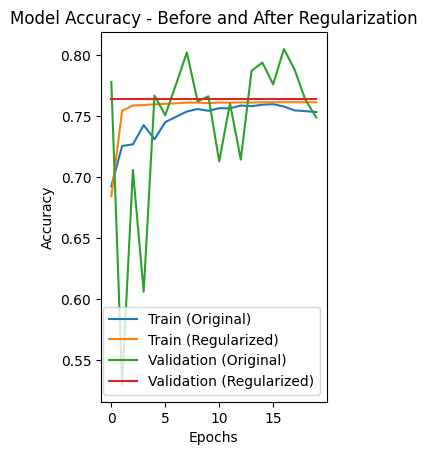

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history_reg.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_reg.history['val_accuracy'])
plt.title('Model Accuracy - Before and After Regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train (Original)', 'Train (Regularized)', 'Validation (Original)', 'Validation (Regularized)'],
           loc='lower right')




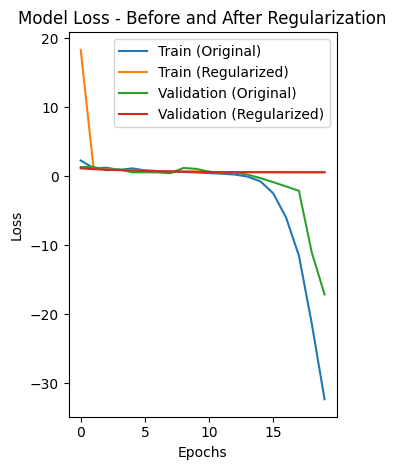

In [ ]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history_reg.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_reg.history['val_loss'])
plt.title('Model Loss - Before and After Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train (Original)', 'Train (Regularized)', 'Validation (Original)', 'Validation (Regularized)'],
           loc='upper right')
plt.tight_layout()
plt.show()

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

In [27]:
#splitting and loading dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [28]:
plt.figure( figsize = (7,7) )

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

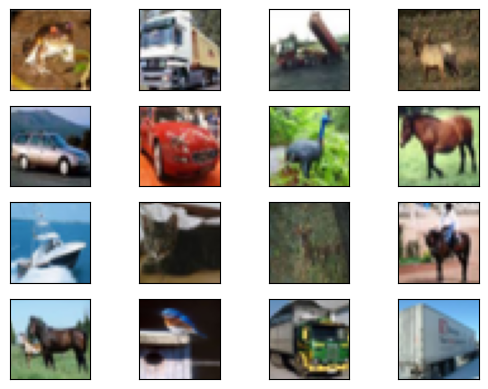

In [29]:
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [30]:
#normalization
train_images, test_images = train_images/255.0, test_images/255.0

In [34]:
#ANN model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (32,32,3)), #cifar10 dataset(tf.keras.layers.Flatten(input_shape = (28,28)) - for mnist dataset)
  tf.keras.layers.Dense(300, activation = 'sigmoid'),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

In [35]:
#compile the model
model.compile ( optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

In [36]:
#fit the model
results = model.fit ( train_images, train_labels, epochs = 10, batch_size = 1000 )

Epoch 1/10
50/50 [==============================] - 5s 92ms/step - loss: 2.1732 - accuracy: 0.2529
Epoch 2/10
50/50 [==============================] - 4s 87ms/step - loss: 1.8497 - accuracy: 0.3536
Epoch 3/10
50/50 [==============================] - 6s 116ms/step - loss: 1.7790 - accuracy: 0.3782
Epoch 4/10
50/50 [==============================] - 4s 87ms/step - loss: 1.7332 - accuracy: 0.3945
Epoch 5/10
50/50 [==============================] - 8s 156ms/step - loss: 1.6972 - accuracy: 0.4061
Epoch 6/10
50/50 [==============================] - 7s 142ms/step - loss: 1.6651 - accuracy: 0.4200
Epoch 7/10
50/50 [==============================] - 6s 115ms/step - loss: 1.6388 - accuracy: 0.4261
Epoch 8/10
50/50 [==============================] - 5s 102ms/step - loss: 1.6107 - accuracy: 0.4380
Epoch 9/10
50/50 [==============================] - 9s 176ms/step - loss: 1.5880 - accuracy: 0.4473
Epoch 10/10
50/50 [==============================] - 6s 125ms/step - loss: 1.5735 - accuracy: 0.4496


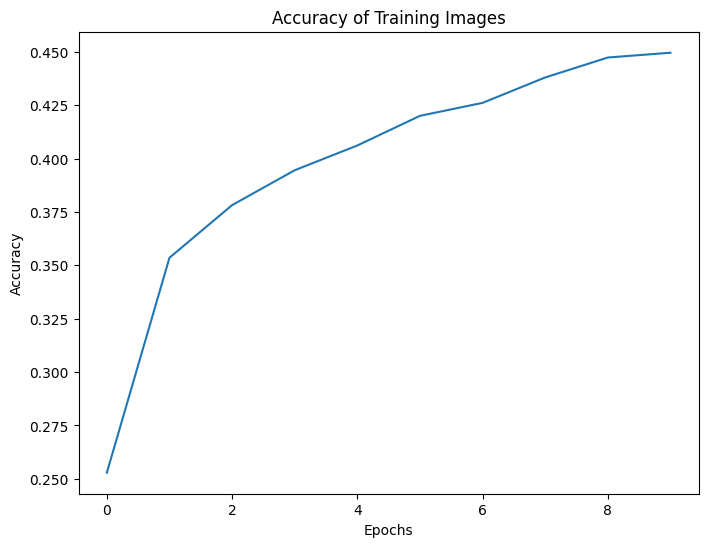

In [37]:
#visualization of the accuracy rate
plt.figure(figsize = (8, 6))
plt.plot(results.history['accuracy'])
plt.title("Accuracy of Training Images")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [38]:
#model prediction
predictions = model.predict ( test_images )

313/313 [==============================] - 1s 4ms/step


In [39]:
predictions

array([[0.02804995, 0.05490202, 0.09629692, ..., 0.0042495 , 0.09888041,
        0.00619939],
       [0.05266929, 0.15725587, 0.00955493, ..., 0.00243692, 0.39575753,
        0.3569427 ],
       [0.12819526, 0.10391794, 0.01266414, ..., 0.00400476, 0.6284556 ,
        0.09978423],
       ...,
       [0.006491  , 0.00246463, 0.10728295, ..., 0.04103685, 0.00380301,
        0.00409423],
       [0.02709179, 0.01791118, 0.11910207, ..., 0.02550316, 0.00992834,
        0.01468434],
       [0.05018559, 0.00695716, 0.15688261, ..., 0.3220205 , 0.01712841,
        0.01384481]], dtype=float32)

In [40]:
predicted_labels = np.argmax ( predictions, axis = -1 )

In [41]:
predicted_labels


array([3, 8, 8, ..., 5, 6, 7])

In [42]:
#accuracy score
test_accuracy = accuracy_score ( test_labels, predicted_labels )

In [43]:
print(test_accuracy)

0.4367
